# Algorithm Study Week 4

## 7. Quick Sort
퀵 정렬은 병할 정렬과 마찬가지로 **분할 정복 문제**의 일종이다.
1. Divde : A[p..r]을 A[p...q-1]과 A[q+1...r]로 분할
2. Conquer : A[p..q-1]과 A[q+1..r]을 재귀적 호출을 통해 sort
3. Combine : Subarray가 정렬되어 있기 때문에 단순히 합치면 된다.



### 7-1 Performance of Quicksort
퀵 정렬은 Partitioning이 Balanced / Unbalanced 여부에 따라 시간이 가려진다.분할이 밸런스가 갖추어져 있을 때 **병합정렬과 유사**하게 되고, 밸런스가 잘 갖추어져 있지 않을 때 **삽입정렬과 유사**하게 된다.

> **Wosrt Case)**
최악의 경우는 길이가 n인 배열의 분할의 과정이 n-1과 0으로 분할하게 되는 경우(길이가 균형을 갖추지 않을때)이다. 이 경우 
T(n) = T(𝒏−𝟏) + T(0) + Θ(𝒏)= T(𝒏−𝟏) + Θ(𝒏)이 되고 재귀적 함수를 통해 **T(n) = Θ(𝑛2)** 이 된다.

> **Best Case)**
최상의 경우는 길이가 n인 배열의 분할의 과정에서 n/2의 Subarray로 분할되는 경우이다. 이 경우 
T(n) = 2T(𝑛/2) + Θ(𝑛)이 되고 최종적인 복잡도는 
**T(n) = Θ(𝑛lg𝑛)** 이 된다. *Master Method 방법* 
1.
a= 2, b= 2,
2.
𝑛𝑙𝑏𝑎= 𝑛𝑙2= 𝑛1
3.
∴Case 2. applied
4.
T(n)= Θ(𝑛^(log𝑏𝑎)lg𝑛)= Θ(𝑛lg𝑛)

### Average case)
평균적인 사례에서 복잡도는 Best Case에 훨씬 가깝게 근사하게 된다. 
예를 들어, 9-1 비율로 split하게 되는 퀵 정렬과정은 

T(n) = T(9𝑛/10) + T(𝑛/10) + cn 이 된다.
각 level에서의 시간은 n에 비례하는 cn의 시간이 걸리기 때문에 깊이 
log10𝑛= Θ(lg𝑛)에 의해

**O(nlg𝑛)** 이 된다.

추가적으로 일정한 비율로 분할하게 되는 모든 퀵정렬은 위와같은 복잡도를 가지게 된다.
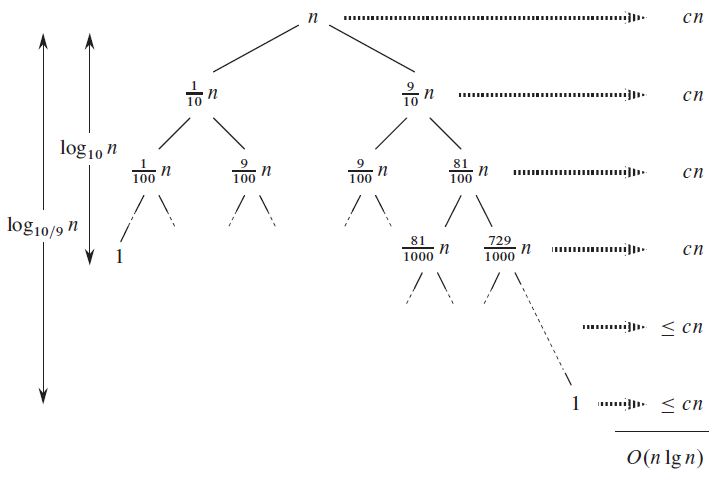

> 현실적으로 재귀적 함수를 통한 과정에서 일정한 비율로의 split은 이루어지지 않는다. 그러나 *좋은 분할, 나쁜 분할* 을 섞어서 사용하는 과정에서 O(nlgn)의 복잡도를 가지게 된다.모든 level에서 Worst Case로 분할할 경우 O(𝒏𝟐)

In [74]:
def PARTITION(A,p,r):
    """
    주어진 A에서 마지막 원소의 값을 기준으로 해당 값보다 같거나 작은 원소들을 
    왼편에, 큰 원소들을 오른편으로 놓는 함수
    """
    x = A[r-1] # pivot = 해당 array에서 마지막 원소
    i = p-1 # pivot보다 작은 원소들의 개수 - 마지막에 pivot들어갈 위치 지정
    for j in range(p,r-1):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r-1] = A[r-1], A[i+1]
    return i+1

In [75]:
def QUICKSORT(A,p,r):
    """
    앞서 정의된 PARTITION 함수를 활용하여 quick sort
    """
    if p<r: 
        q = PARTITION(A,p,r)
        QUICKSORT(A,p,q)
        QUICKSORT(A,q+1,r)

In [76]:
# 예시 데이터 
a = [2,8,7,1,3,5,6,4]
QUICKSORT(a,0,8)
a

[1, 2, 3, 4, 5, 6, 7, 8]

### 7-2 Randomized Version of QuickSort

앞선 예재에서는 주어진 배열의 마지막 원소(A[r])을 pivot으로 정렬을 하였으나, **Random Sampling** 의 개념을 활용하여 Subarray에서 pivot을 임의적으로 선택하는 것이다.

> 임의적으로 Pivot을 선택하는 경우에서서 Expected running time
퀵정렬의 Running time은 분할하는 Time이 결정하게 된다 => 따라서 Partition 함수에서 비교문 **if A[j]=<x 가 몇번 실행되는 지** 가 결정하기 된다.  

> Xij= I {zi is compared to zj}의 indicator variable을 정의하자. 총 비교된 횟수 X는 다음과 같다.
X= Σ𝑖=1,𝑛−1Σ𝑗=𝑖+1,𝑛 (Xij)


여기서 Radomized-Partition은 각각의 Pivot을 독립적이고 랜덤하게 뽑는것을 가정한다. 이에 따라 계산 과정은 다음과 같다.

Zij는 j-i+1의 원소를 가지고 있고 각 원소들은 pivot으로 선정될 확률이 동일하기 때문이다.

또한 Zij는 zi 혹은 zj가 pivot으로 설정될 때만 비교된다.

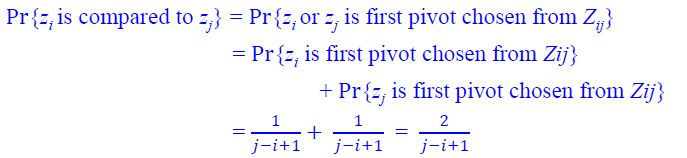

In [118]:
from IPython.display import Image
Image("C:/Users/study gil/Documents/1.jpg")

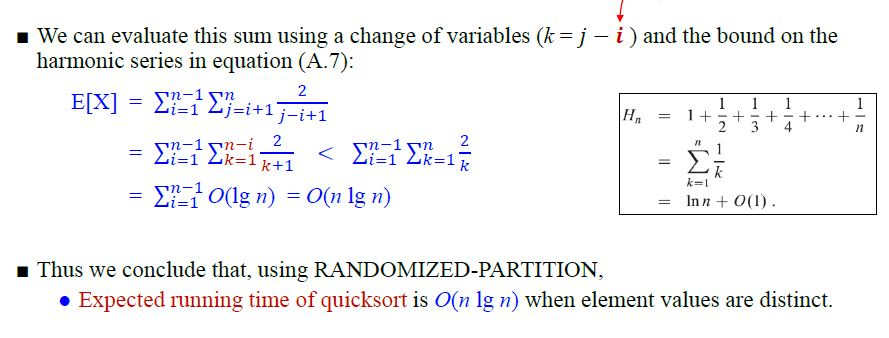

In [120]:
Image("C:/Users/study gil/Documents/2.jpg")

In [112]:
import random 
def RANDOMIZED_PARTITION(A,p,r):
    """
    p부터 r-1까지의 정수(위치)에서 랜덤으로 한 위치를 뽑고
    해당 위치를 pivot으로 분할하는 함수
    """
    i = random.randint(p,r-1)
    A[r-1], A[i] = A[i], A[r-1]
    return PARTITION(A,p,r)

In [113]:
def RANDOMIZED_QUICKSORT(A,p,r):
    """
    랜덤으로 뽑힌 pivot을 기준으로 퀵정렬을 수행하는 함수 
    """
    if p<r:
        q = RANDOMIZED_PARTITION(A,p,r)
        RANDOMIZED_QUICKSORT(A,p,q)
        RANDOMIZED_QUICKSORT(A,q+1,r)

In [116]:
a = [2,8,7,1,3,5,6,4]
RANDOMIZED_QUICKSORT(a,0,8)
a

[1, 2, 3, 4, 5, 6, 7, 8]

### Summary
길이가 n인 input array에서 
- 퀵 정렬은 최악의 경우 Θ(𝑛2)의 Running Time을 가진다.
- 그럼에도 불구하고, 평균적으로 Θ(nlgn)의 복잡도를 가지기 때문에 현실적으로 최선의 선택지가 될 수 있다.
- 가상 메모리 환경에도 잘 적용될 수 있다.

## 11. Hash Tables

### 11.1 Direct - address tables

시나리오
- Dynamic set을 유지한다
- U : {0,1,,,m-1}은 Key Universe
- K : 실제로 사용하는 Actual Keys

Direct - address table(혹은 배열)은 **각 slot에 U 중 해당하는 각각의 key를 가지고 있고** 원소 x(with key k)가 없는 경우 T[k] = NIL

Dictionary operations : Each of these operations takes only O(1) time.
=> 검색, 삽입, 삭제

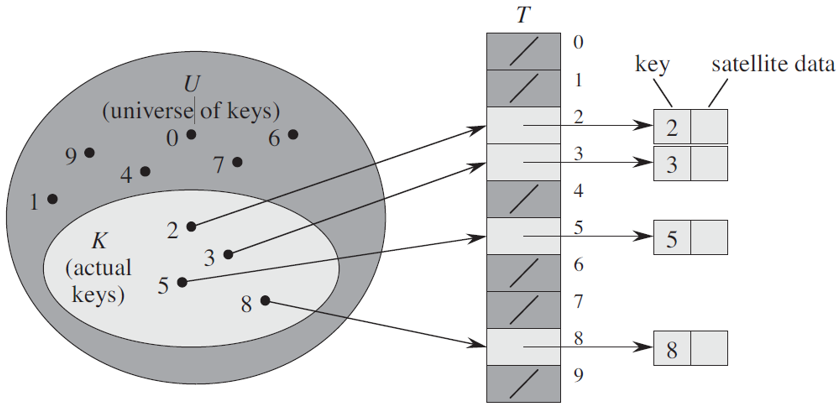

### 11.2 Hash Tables

Direct Addressing는 Universe U가 상당히 큰 경우 그에 해당하는 크기의 table을 구현하기에는 비현실적이라는 큰 단점을 가진다.

**HASH TABLE**은 이러한 메모리 상의 비효율적인 측면을 고려하여 보완하는 것으로 T에 할당되는 것에서 빈 slot으로 버려지는 공간이 없다. 

>더불어, Direct Address와 마찬가지로 O(1)의 검색에서의 복잡도를 가진다(Average, not worst)

해시 함수는 임의의 길이를 갖는 임의의 데이터에 고정된 길의 데이터로 매핑하는 함수를 말한다. 

- 매핑 전의 원래 데이터 값을 키(key)
- 매핑 후 데이터의 값을 해시 값 (hash value)
- 해시 값 + 데이터의 색인 주소를 해시 테이블(hash table)
- 매핑하는 과정 자체를 해싱(hashing)이라고 한다.

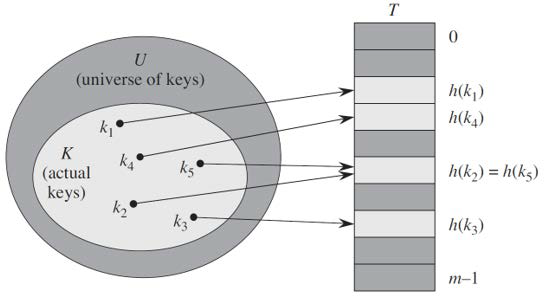

### Collisions

Collisions(해시 충돌)이란 동일한 bucket에 할당을 받아 일어나는 경우이다.

- slots(bucket)의 수보다 keys가 많은 경우
- 즉, |K| > m의 경우 (여기서 m은 slots의 수)

이러한 문제는 반드시 해결되어야 하며, **1. Chaining 2. Open Adressing**으로 해결할 수 있다.

*Chaining is usally better than oepn addressing*


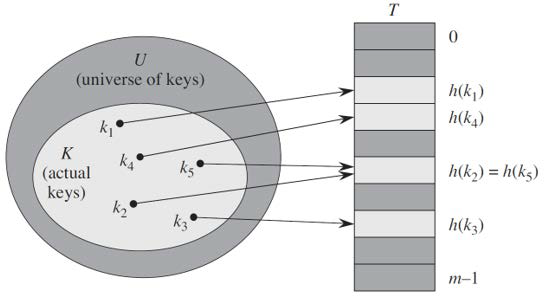

### Chaining 

체이닝(Chaining)이란, Bucket 내에 연결리스트(Linked List)를 할당하다가 충돌이 발생하면 연결 리스트로 데이터들을 연결하는 방식이다. 

> 체이닝은 다음과 같은 장점을 가진다. 첫 째로는 연결 리스트만 사용하면 되기 때문에 복잡한 계산식을 사용할 필요가 적다. 또한 해시테이블이 채워질수록, Lookup 성능저하가 Linear하게 발생한다.
참고자료: https://preamtree.tistory.com/20

여기서 연결리스트란? 

일반적인 배열 원소들의 순서를 유지하면서 원소를 삽입하거나 임의의 위치에서 원소를 삭제하는 것은 **O(N)** 의 시간이 걸린다. *연결리스트* 특정 위치에서 삽입과 삭제를 상수 시간에 할 수 있게 해주며, 다음과 같은 특징을 가진다. 

* 메모리의 연속된 위치에 각 원소가 저장되어 있는 일반적인 배열과는 달리, 여기저기 흩어져 있고, 포인터로 그 순서를 구성하고 있다.
* 원소, 포인터의 집합들을 리스트의 노드(Node)라고 부른다.
* 특정 위치의 원소를 찾기 위해서는 하나씩 포인트를 따라가며 찾게 되고 길이에 선형 비례하는 시간이 드는 단점이 있다.
* 반면, 노드의 순서를 유지면서 노드를 삽입하거나, 기존 노드를 삭제하는 것은 상수의 시간이 든다.

> 일반적인 배열과 달리 포인트만 변경하면 간단하게 변경이 가능하기에 연결리스트에서의 삽입과 삭제는 매우 간단한 작업으로 이루어 질 수 있
다.

참고 : https://comdoc.tistory.com/entry/3-%EC%97%B0%EA%B2%B0-%EB%A6%AC%EC%8A%A4%ED%8A%B8Linked-list-ADT-%ED%8C%8C%EC%9D%B4%EC%8D%AC

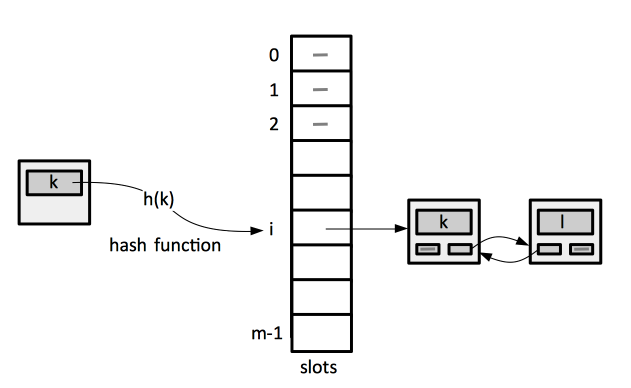

In [ ]:
[1,2,3,4,5]
1. 순서 2. 

### Analysis of Hashing with Chaining

* n = 테이블에서 전체 원소의 개수
* m = 테이블에서 slot의 개수
* Load Factor : α = n/m

평균적인 사례에서 체이닝을 활용한 해싱은 **an unsuccessful search**와 **sucessful search**은 **Θ(1 + α )** 이 된다

(Under Simple Uniform Hashing Assumption)

> **Simple Uniform Hashing Assumption**: 
For j= 0, 1, … , m–1, let us denote the length of the list T[j] by nj,
so that n= n0+ n1+ · · · + nm-1, and the expected value of njis E[nj] = α= n/m

> **Unsuccessful Search** : 
키값에 해당하는 데이터가 해시테이블에 존재하지 않는 경우

> **Successful Search**:
키값에 해당하는 데이터가 해시테이블에 존재하는 경우

참고자료: https://ratsgo.github.io/data%20structure&algorithm/2017/10/25/hash/

### Hash Fuctions 

좋은 해시 함수는 the assumption of simple uniform hashing을 (거의) 만족하는 함수이다. 하지만, 현실적으로 이러한 조건을 체크할 수 있는 방법이 많지 않은데 이는 keys의 분포를 아는 경우가 거의 없기 때문이다.

따라서, 현실적으로 **Heuristic Techniques**을 활용하여 해시함수가 잘 작동할 수 있도록 한다. 그러기 위해서는 패턴의 독립성을 최대한 만족해야 한다. 예를들어, pt, pts는 비슷하게 연관된 심볼로 same slot에 들어갈 가능성이 있다.

> **Interpreting Keys as Natural Numbers**:
앞서 소개한 문제를 해결하기 위해, 자연수로 키를 바꿔주는 사용한다. 예를 들어, pt의 symbol이 온 경우 ASCII을 사용하여 변환한다. p = 112, t =116 이므로 pt는 (112 * 128) + 116이 된다(128 기수 기준)

### Division vs Multiplication Method

**Division Method** 
데이터가 입력되는 주소(index) = 입력값 % 테이블 크기 

- h(x) = x mod m 
- 여기서 m은 2의 지수형태와 매우 가까운 수가 아닌 **소인수**가 좋은 것으로 알려져 있다. 
- 예를 들어, m = 2^p인 경우, h(k)는 단지 p lowest-order bits of k가 된다. 따라서 이는 좋은 해시 함수의 조건인 eqaully likly가 아닌 패턴을 가질 위험이 높다.

**Multiplication Method**
데이터가 입력되는 주소(index) = h(k) = |m(kAmod1)|
여기서 A는 0과 1사이인 상수 0<A<1

- m의 값은 크리티컬하지 않다는 장점
- 따라서 m은 2의 지수형태로 설정(컴퓨터 계산상 빠르기에)
- 대부분의 상수인 A에 잘 작용하지만, A≈(√5 –1)/2 = 0.6180339887(by Knuth)이 자주 사용된다. 

> 예를 들어, 크기 m이 65,536인 해시 테이블에서 A=0.6180339887로 정해져 있다고 하고 해쉬값을 구하면, xA = 1,025,390 x 0.6180339887 = 633,725.871673093이 된다. 이 값에서 소수부만 추출하면 0.871673093이 되고, 이 값에 해쉬 테이블의 크기인 65,536을 곱하면 57,125.967... 이 된다. 이 수에서 정수부만 취하면 57,125가되어 원소 1,025,390에 대한 해쉬 주소는 57,125가 된다.

참고: https://itstory.tk/entry/%ED%95%B4%EC%8A%81Hashing-%ED%95%B4%EC%89%AC-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%ED%95%B4%EC%89%AC-%ED%95%A8%EC%88%98

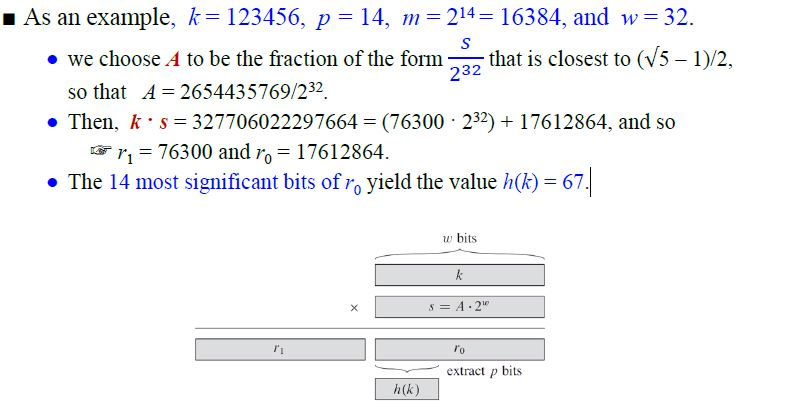

In [2]:
from IPython.display import Image
Image("C:/Users/study gil/Documents/1.jpg")

## 코딩테스트 연습문제
### 1. 완주하지 못한 선수

본 문제는 다음과 같다. 
1. 수많은 마라톤 선수들 중 단 한 명의 선수를 제외하고는 모든 선수들이 완주했다.
2. 참여한 선수들의 이름이 담긴 배열 participant와 완주한 선수들의 이름이 담긴 completion이 주어질 때, 완주하지 못한 선수의 이름을 Return한다.
3. 참여자의 이름은 1개 이상 20개 이하의 알파벳 소문자로 이루어져 있다. 
4. 참여자 중에는 돔영이인이 있을 수 있다.

In [42]:
def solution(participant, completion):
    """
    Completion에 없는 단 한명의 Participant를 Return하는 함수
    """
    temp= 0
    for i in range(len(participant)):
        if participant[i] not in completion:
            temp = participant[i]
            break
        else:
            completion.remove(participant[i])
        return temp 

In [43]:
# Test Data
a = ['mislav', 'stanko', 'mislav', 'ana']
b = ['stanko', 'ana', 'mislav']
solution(a,b)

'mislav'

In [44]:
# 다른 사람 풀이 
def solution(participant, completion):
    answer = ''
    temp = 0
    dic = {}
    for part in participant:
        dic[hash(part)] = part 
        temp += int(hash(part))
    # dic 함수에 해시 값을 key로 각 값을 value로 만듦
    # temp는 모든 해시 값의 합으로 지정
    for com in completion:
        temp -= hash(com)
    # 완주한 선수들의 hash값 들을 빼줌
    answer = dic[temp]
    # 남아있는 해시 값에 해당하는 value가 정답
    return answer

In [47]:
a = ['mislav', 'stanko', 'mislav', 'ana']
b = ['mislav', 'stanko', 'mislav']
print(hash(b[0]),hash(a[0]))
# 동일한 것을 확인할 수 있다. 

-1294361184903607447 -1294361184903607447


### 2. 전화번호 목록

본 문제는 다음과 같다. 

1. Phone_Book에 적힌 전화번호 중, 한 번호가 다른 번호의 접두어인 경우가 있는지 확인한다.
2. 전화번호를 담은 배열 phone_book이 매개변수로 주어질 때, 어떤 번호가 다른 번호의 접두어인 경우가 있으면 false, 없으면 true를 반환한다.
3. phone_book의 길이는 1이상 1,000,000 이하이다.
4. 각 전화번호의 길이는 1 이상 20 이하이다.

In [6]:
def solution(phone_book):
    answer = True
    sort = sorted(phone_book)
    # phone_book의 첫 번째 숫자를 기준으로 정렬화 시킴
    for i in range(1,len(sort)):
        if sort[i-1] in sort[i]:
            # i-1번째가 i번째에 속하면 False하고 break
            answer = False
            break
    return answer

In [2]:
# Test Data
a = ['119', '97674223', '1195524421']
b = sorted(a)
b
#solution(a)

['119', '1195524421', '97674223']

### 3. 위장

본 문제는 다음과 같다. 

1. 스파이들은 매일 다른 옷을 조합하여 위장한다.
2. 스파이가 가진 의상들이 담긴 2차원 배열 clothes가 주어지면 서로 다른 옷의 조합의 수를 return하도록 solution 함수를 작성한다.
3. 하루에 한 종류의 옷만 입을 수도 있다.
4. clothes의 각 행은 [의상의 이름, 의상의 종류]로 이루어져 있다.
5. 의상의 수는 1개 이상 30개 이하이며, 모든 문자열의 길이는 1이상 20이하인 자연수이고 알파벳 소문자 또는 '_'로만 이루어져있다.

In [32]:
import numpy as np
def solution(clothes):
    answer = []
    cloth = np.array(clothes)
    index = set(cloth[:,1]) # 주어진 모든 옷의 종류의 집합을 만듦
    for value in index:
        answer.append(float(sum(cloth[:,1]== value)))
        # 각 종류에서의 옷 개수를 구함
    answer = np.array(answer)+1
    # 각 옷 종류에서 옷 개수 + 1 (해당 종류의 옷을 안 입는 경우)
    return int(answer.cumprod().max()-1)
# 공집합의 개수 1을 빼줌

In [8]:
import numpy as np
#b =np.array([['crow_mask', 'face'], ['blue_sunglasses', 'face'], ['smoky_makeup', 'face']])
#b[:,1]
a=np.array([1,2,3])
a.cumprod()

array([1, 2, 6], dtype=int32)